# Stroke_Prediction

In [1]:
import numpy as np       # Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\IN Progress\Stroke Prediction\healthcare-dataset-stroke-data.csv') #reading csv file
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### PREPROCESSING

In [3]:
df.columns.tolist()     #Checking columnslist

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [4]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

# Replacing Categorical data to Numerical values (Label Encoding)

In [5]:
from sklearn import preprocessing                           #using Label Encoder
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])  
df['ever_married'] = label_encoder.fit_transform(df['ever_married']) 
df['work_type']= label_encoder.fit_transform(df['work_type']) 
df['Residence_type']= label_encoder.fit_transform(df['Residence_type']) 
df['smoking_status']= label_encoder.fit_transform(df['smoking_status']) 
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


# NAN Value to numeric value

In [6]:
# age

df['age'] = df['age'].fillna((df['avg_glucose_level'].mean()))
df['age']= df['age'].astype(int)
print (df['age'].unique()) 
print() 
print(df['age'].dtypes) 
df

[67 61 80 49 79 81 74 69 59 78 54 50 64 75 60 57 71 52 82 65 58 42 48 72
 63 76 39 77 73 56 45 70 66 51 43 68 47 53 38 55  1 46 32 14  3  8 37 40
 35 20 44 25 27 23 17 13  4 16 22 30 29 11 21 18 33 24 34 36  0 41  5 26
 31  7 12 62  2  9 15 28 10 19  6]

int32


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51,0,0,1,2,0,166.29,25.6,1,0


In [7]:
# hypertension 

df['hypertension'] = df['hypertension'].fillna((df['hypertension'].mean())) 
df['hypertension']= df['hypertension'].astype(int) 
print (df['hypertension'].unique()) 
print() 
print(df['hypertension'].dtypes) 
df


[0 1]

int32


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51,0,0,1,2,0,166.29,25.6,1,0


In [8]:
# heart_disease 
df['heart_disease'] = df['heart_disease'].fillna((df['heart_disease'].mean()))
df['heart_disease']= df['heart_disease'].astype(int)
print (df['heart_disease'].unique()) 
print() 
print(df['heart_disease'].dtypes) 
df

[1 0]

int32


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51,0,0,1,2,0,166.29,25.6,1,0


In [9]:
# avg_glucose_level

df['avg_glucose_level'] = df['avg_glucose_level'].fillna((df['avg_glucose_level'].mean()))
df['avg_glucose_level']= df['avg_glucose_level'].astype(int) 
print (df['avg_glucose_level'].unique()) 
print()
print(df['avg_glucose_level'].dtypes) 
df

[228 202 105 171 174 186  70  94  76  58  80 120 104 219 214 167 191 221
  89 217 193 233 208 102 100 189 195 211 212  83 196 252  84  74  92  60
  78  71 144  90 213 243 109 107  99  75 127 124 197  59 237 194 180 185
  61  93 113  86  72  62 179 116  96  66 240 110 165 143 101  88  79 111
  98 226  68  64 235  82 190 231  73 129 106 224 216 259 249 131 200 130
 182 206 263 140 207 199 103 151  67 239 169 223  77  57  81 203 133 162
  91  97  56 112 137 215 209 205 118 271 242 114 175  87 134  95 210 250
 184 218 247  69 161  85 198  55 149 117 141 146 220 115 234 229 138 136
 126  63 251 123 122 178 147 139 225 227 145 201 170 132  65 183 108 155
 163 188 204 125 158 148 156 121 119 222 128 173 152 254 160 135 236 142
 232 157 246 153 230 267 150 181 244 154 253 238 168 176 187 164 192 266
 172 255 177 260 159 248 261 256 166]

int32


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228,36.6,1,1
1,51676,0,61,0,0,1,3,0,202,NaN,2,1
2,31112,1,80,0,1,1,2,0,105,32.5,2,1
3,60182,0,49,0,0,1,2,1,171,34.4,3,1
4,1665,0,79,1,0,1,3,0,174,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,2,1,83,NaN,2,0
5106,44873,0,81,0,0,1,3,1,125,40.0,2,0
5107,19723,0,35,0,0,1,3,0,82,30.6,2,0
5108,37544,1,51,0,0,1,2,0,166,25.6,1,0


In [10]:
#bmi 

df['bmi'] = df['bmi'].fillna((df['bmi'].mean()))
df['bmi']= df['bmi'].astype(int)
print (df['bmi'].unique()) 
print() 
print(df['bmi'].dtypes) 
df

[36 28 32 34 24 29 27 22 30 37 25 48 26 23 44 33 20 38 39 31 40 47 21 45
 41 19 56 35 46 42 16 18 17 50 54 60 43 64 15 13 49 51 71 12 55 14 57 52
 78 53 66 10 97 11 63 61 58 59 92]

int32


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228,36,1,1
1,51676,0,61,0,0,1,3,0,202,28,2,1
2,31112,1,80,0,1,1,2,0,105,32,2,1
3,60182,0,49,0,0,1,2,1,171,34,3,1
4,1665,0,79,1,0,1,3,0,174,24,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,2,1,83,28,2,0
5106,44873,0,81,0,0,1,3,1,125,40,2,0
5107,19723,0,35,0,0,1,3,0,82,30,2,0
5108,37544,1,51,0,0,1,2,0,166,25,1,0


In [11]:
#  stroke  

df['stroke'] = df['stroke'].fillna((df['stroke'].mean()))
df['stroke']= df['stroke'].astype(int)
print (df['stroke'].unique())
print()
print(df['stroke'].dtypes)
df

[1 0]

int32


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228,36,1,1
1,51676,0,61,0,0,1,3,0,202,28,2,1
2,31112,1,80,0,1,1,2,0,105,32,2,1
3,60182,0,49,0,0,1,2,1,171,34,3,1
4,1665,0,79,1,0,1,3,0,174,24,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,2,1,83,28,2,0
5106,44873,0,81,0,0,1,3,1,125,40,2,0
5107,19723,0,35,0,0,1,3,0,82,30,2,0
5108,37544,1,51,0,0,1,2,0,166,25,1,0


In [12]:
df = df.drop(['id'],axis = 1)       #dropping unnecessary columns
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228,36,1,1
1,0,61,0,0,1,3,0,202,28,2,1
2,1,80,0,1,1,2,0,105,32,2,1
3,0,49,0,0,1,2,1,171,34,3,1
4,0,79,1,0,1,3,0,174,24,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83,28,2,0
5106,0,81,0,0,1,3,1,125,40,2,0
5107,0,35,0,0,1,3,0,82,30,2,0
5108,1,51,0,0,1,2,0,166,25,1,0


# Outliers Imputing

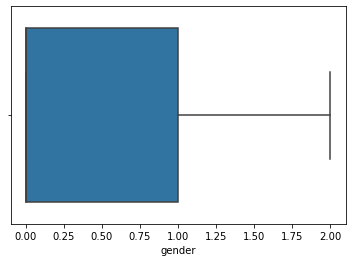

In [13]:
a1 = sns.boxplot(x=df['gender'])

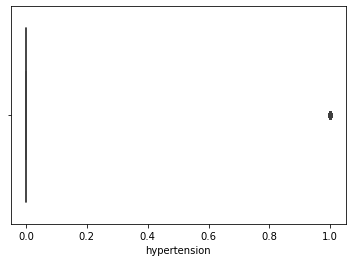

In [14]:
a2 = sns.boxplot(x=df['hypertension'])

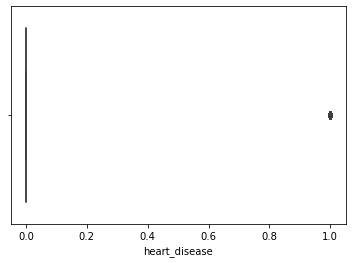

In [15]:
a3 = sns.boxplot(x=df['heart_disease'])

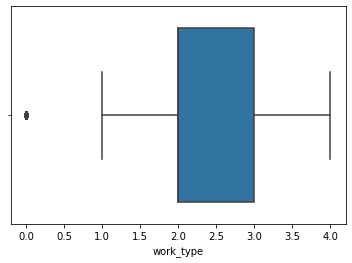

In [16]:
a4 = sns.boxplot(x=df['work_type'])

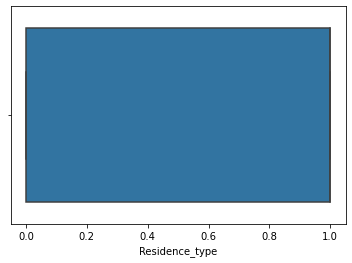

In [17]:
a6 = sns.boxplot(x=df['Residence_type'])

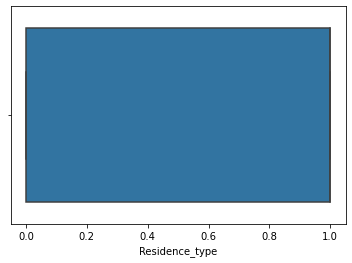

In [18]:
a6 = sns.boxplot(x=df['Residence_type'])

In [19]:
df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [20]:
df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [21]:
X = df[['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']]
y = df['stroke']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             5110 non-null   int32
 1   age                5110 non-null   int32
 2   hypertension       5110 non-null   int32
 3   heart_disease      5110 non-null   int32
 4   ever_married       5110 non-null   int32
 5   work_type          5110 non-null   int32
 6   Residence_type     5110 non-null   int32
 7   avg_glucose_level  5110 non-null   int32
 8   bmi                5110 non-null   int32
 9   smoking_status     5110 non-null   int32
 10  stroke             5110 non-null   int32
dtypes: int32(11)
memory usage: 219.7 KB


In [23]:
from sklearn.model_selection import train_test_split     #data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

# Standardization

In [24]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


In [25]:
X_test

array([[ 1.17275977, -0.14805264,  3.01973705, ..., -0.28428647,
        -0.5816084 ,  1.5198012 ],
       [-0.85098103,  0.6040721 , -0.33115466, ..., -0.19633875,
         1.25875274, -1.2817683 ],
       [-0.85098103,  0.69255737, -0.33115466, ..., -0.35024725,
        -0.05579093, -0.3479118 ],
       ...,
       [-0.85098103, -0.41350844, -0.33115466, ..., -0.39422111,
        -0.71306277,  0.5859447 ],
       [ 1.17275977,  1.53316738, -0.33115466, ...,  3.0137528 ,
        -0.05579093,  1.5198012 ],
       [-0.85098103,  0.78104263, -0.33115466, ..., -0.19633875,
         0.07566344, -0.3479118 ]])

In [26]:
nameOfClassifiers=[]
Accuracy=[]

# Logistic Regression Classifier


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
lr.score(X_test, y_test)

print("The accuracy of Logistic Regression Classifier Model is {:.2f}".format(lr.score(X_test, y_test)))
nameOfClassifiers.append("Logistic Regression Classifier")
Accuracy.append(lr.score(X_test, y_test))

The accuracy of Logistic Regression Classifier Model is 0.95


# MLPClassifier 

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=20, max_iter=100000, hidden_layer_sizes=16, activation='tanh').fit(X_train, y_train)
mlp.score(X_test, y_test)

print("The accuracy of MLP Classifier Model is {:.2f}".format(mlp.score(X_test, y_test)))
nameOfClassifiers.append("MLP Classifier Model")
Accuracy.append(mlp.score(X_test, y_test))

The accuracy of MLP Classifier Model is 0.95


# RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0).fit(X_train, y_train)
rf.score(X_test, y_test)

print("The accuracy of Random Classifier Model is {:.2f}".format(rf.score(X_test, y_test)))
nameOfClassifiers.append("Random Classifier Model")
Accuracy.append(rf.score(X_test, y_test))

The accuracy of Random Classifier Model is 0.95


# Support Vector Machine

In [30]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf', gamma ='auto', max_iter = -1).fit(X_train, y_train)
SVC.score(X_test, y_test)

print("The accuracy of Support Vector Machine Model is {:.2f}".format(SVC.score(X_test, y_test)))
nameOfClassifiers.append("Support Vector Machine Model")
Accuracy.append(SVC.score(X_test, y_test))

The accuracy of Support Vector Machine Model is 0.95


# AdaBoostClassifier

In [31]:
from sklearn.ensemble import AdaBoostClassifier
adb =  AdaBoostClassifier(n_estimators=100,algorithm = 'SAMME', learning_rate = 1.5, random_state=0).fit(X_train, y_train)
adb.score(X_test, y_test)


print("The accuracy of Ada Boost Classifier Model is {:.2f}".format(adb.score(X_test, y_test)))
nameOfClassifiers.append("Ada Boost Classifier Model")
Accuracy.append(adb.score(X_test, y_test))

The accuracy of Ada Boost Classifier Model is 0.94


# Voting Classifier

In [32]:
from sklearn.ensemble import  VotingClassifier
clf = VotingClassifier( estimators=[('lr', lr), ('mlp', mlp), ('SVC', SVC), ('rf', rf), ('adb',adb)], voting='hard')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


print("The accuracy of Voting Classifier Model is {:.2f}".format(clf.score(X_test, y_test)))
nameOfClassifiers.append("Voting Classifier Model")
Accuracy.append(clf.score(X_test, y_test))

The accuracy of Voting Classifier Model is 0.95


# Visualization On different Model Scores

Accuracy score for different models


<BarContainer object of 6 artists>

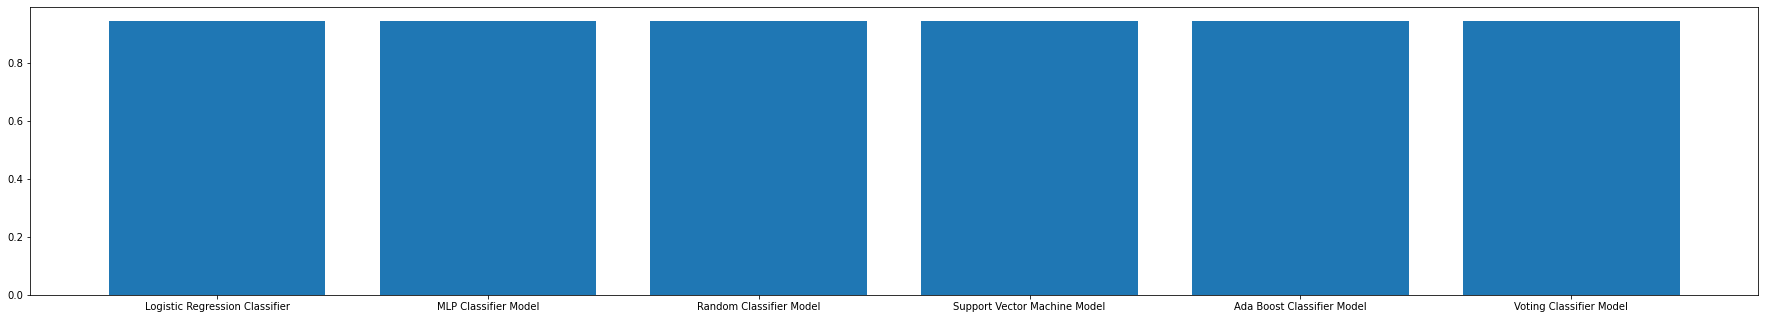

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,4,1])
print("Accuracy score for different models")
y_pos = range(len(nameOfClassifiers))
ax.bar(nameOfClassifiers,Accuracy)